#  TP 2 Algebra Lineal Computacional  - Exactas UBA

## Consigna 1

## Consigna 2


In [2]:
# Importar librerías
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt


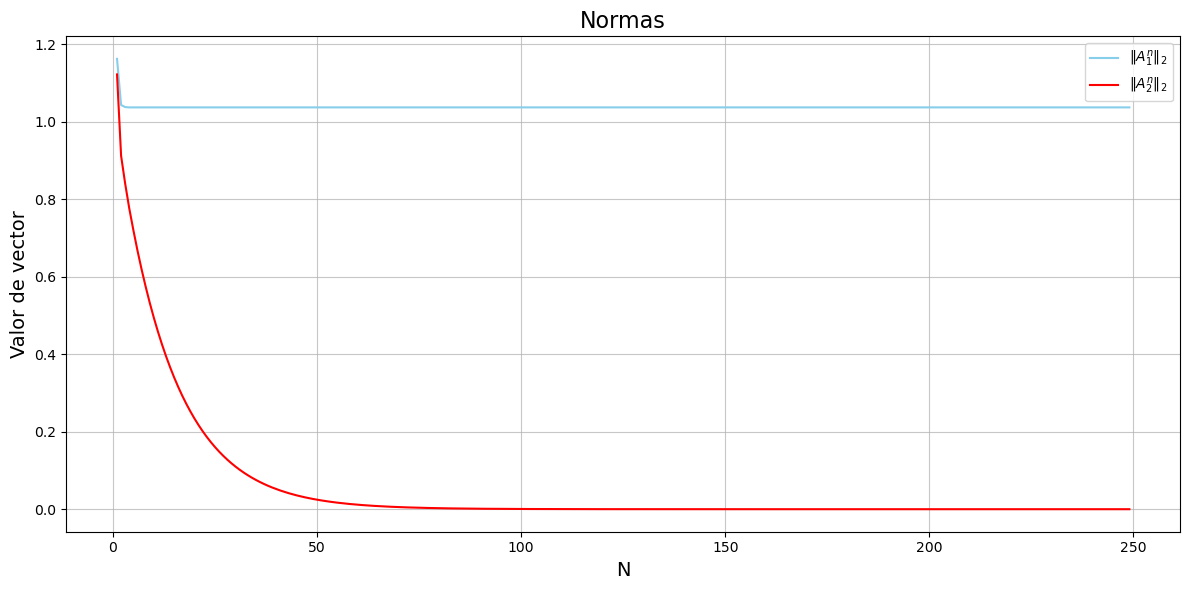

In [49]:
# Definir la matriz A_1
A_1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

# Definir la matriz A_2
A_2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

   
    
normas_A_1 = [scipy.linalg.norm(A_1)]
normas_A_2 = [scipy.linalg.norm(A_2)]
vectores = [1]
A_rec_1=A_1.copy()
A_rec_2=A_2.copy()
for i in range(2,250):
        A_rec_1=A_1@A_rec_1
        A_rec_2=A_2@A_rec_2
        normas_A_1.append(scipy.linalg.norm(A_rec_1))
        normas_A_2.append(scipy.linalg.norm(A_rec_2))
        vectores.append(i)
         
        
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(vectores, normas_A_1, label=r'$\|A_1^n\|_2$', color='skyblue')
plt.plot(vectores, normas_A_2, label=r'$\|A_2^n\|_2$', color='red')
plt.xlabel('N', fontsize=14)
plt.ylabel('Valor de vector', fontsize=14)
plt.title('Normas', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.grid(axis='x', linestyle='-', alpha=0.7)   
# Mostrar el gráfico
plt.tight_layout()
    
plt.show()





## Consigna 3

In [52]:
def metodoDeLaPotencia_Galo(A, v, k):
    dif=20
    tol= 1e-6
    n=[]
    graficodif=[]
    for i in range(k):
        v0=v
        v = A @ v
        v = v / np.linalg.norm(v,2)
        #print(v)
        dif=np.linalg.norm(v-v0)
        graficodif.append(dif)
        if dif<tol:
            break
    for i in range (0,len(graficodif),1):
        n.append(i)
    #print(graficodif)
    graf_x = n
    graf_y = graficodif
    plt.plot(graf_x, graf_y, marker="o")
   
    plt.xlabel('Iteracion')
    plt.ylabel('Diferencia')
    return(v)



def metodoDeLaPotencia(A, v, k=50, tol=1e-6):
    graficodif = []
    
    for i in range(k):
        v0 = v
        v = A @ v
        v = v / np.linalg.norm(v, 2)  # Normalizar el vector
        dif = np.linalg.norm(v - v0)
        graficodif.append(dif)

        if dif < tol:
            break
    
    # Calcular el autovalor dominante
    autovalor = np.dot(v, A @ v)

    return autovalor

def monteCarlo(A, num_trials=250, k=50, tol=1e-6):

    autovalores = []

    for _ in range(num_trials):
        # Vector inicial aleatorio
        v = np.random.rand(A.shape[0])
        autovalor = metodoDeLaPotencia(A, v, k, tol)
        autovalores.append(autovalor)

    # Calcular el promedio y desviación estándar
    promedio = np.mean(autovalores)
    desviacion = np.std(autovalores)

    return promedio, desviacion

# Ejecutar el método de Monte Carlo
promedio, desviacion = monteCarlo(A_1)
print("Promedio del mayor autovalor:", promedio)
print("Desviación estándar:", desviacion)


promedio_2, desviacion_2 = monteCarlo(A_2)
print("Promedio del mayor autovalor:", promedio_2)
print("Desviación estándar:", desviacion_2)


Promedio del mayor autovalor: 1.0000000000000002
Desviación estándar: 0.0
Promedio del mayor autovalor: 0.9276514472123604
Desviación estándar: 1.4977727461875692e-16


## Consigna 4

Por la ec (4)...

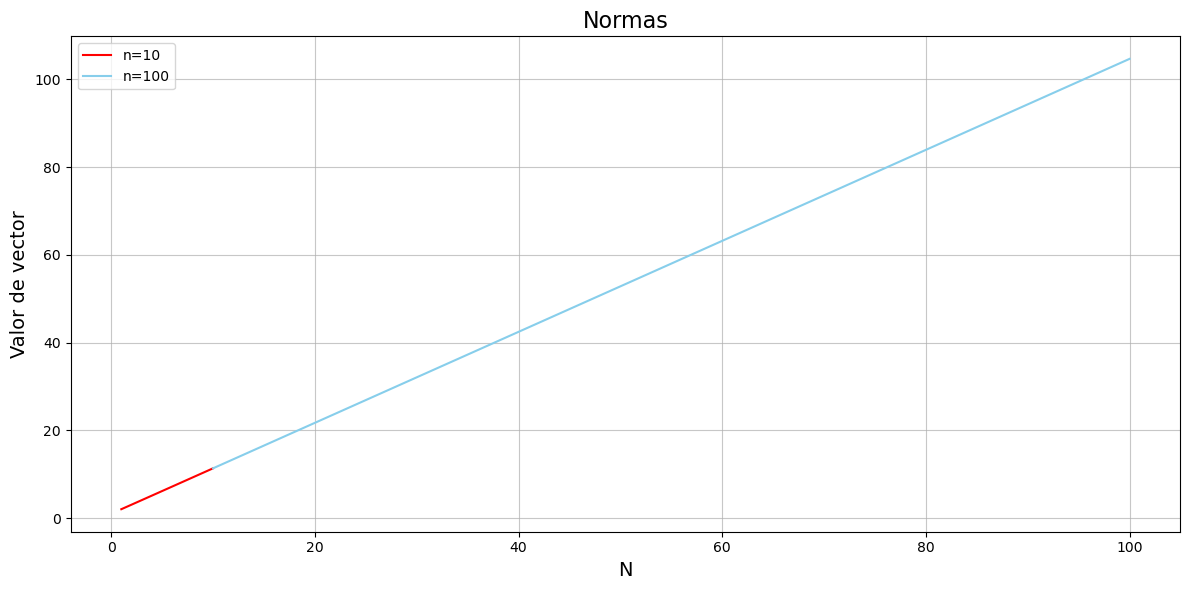

In [141]:
def serie_de_potencias(A):
    I=np.eye(5)
    A_rec=I
    A_serie=I
    n=[]
    norma=[]
    for i in range (100):
        n.append(i)
        A_rec=A_rec@A
        A_serie=A_serie+A_rec
        norma.append(scipy.linalg.norm(A_serie, ord=2))
    return norma, n
        
     
norma_A_1, n= serie_de_potencias(A_1)

plt.figure(figsize=(12, 6))
plt.plot(range(1,11 ), norma_A_1[0:10], color='red', label='n=10')
plt.plot(range(10,101 ), norma_A_1[9:100], color='skyblue', label='n=100')
plt.xlabel('N', fontsize=14)
plt.ylabel('Valor de vector', fontsize=14)
plt.title('Normas', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.grid(axis='x', linestyle='-', alpha=0.7)   
# Mostrar el gráfico
plt.tight_layout()   
plt.show()   




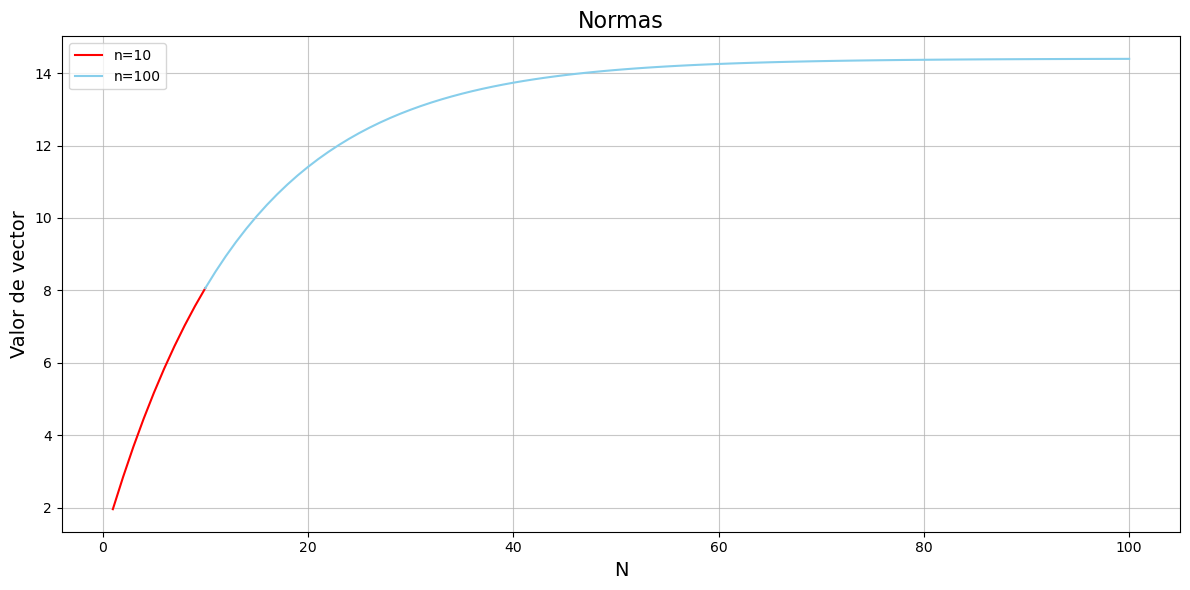

In [143]:
norma_A_2, n_100=serie_de_potencias(A_2)
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), norma_A_2[0:10], color='red', label='n=10')
plt.plot(range(10,101), norma_A_2[9:100], color='skyblue', label='n=100')
plt.xlabel('N', fontsize=14)
plt.ylabel('Valor de vector', fontsize=14)
plt.title('Normas', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.grid(axis='x', linestyle='-', alpha=0.7)   
# Mostrar el gráfico
plt.tight_layout()
    
plt.show()  
